# Presentation 1 - Group 4

In [14]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import normaltest



#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
#this function is to read, transform and join 2 data frame
#%%
def read_secom():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

#concat them vertically
df = pd.concat([df_features,df_target],axis=1)

df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


# Target values

## Frequency distribution

<AxesSubplot:>

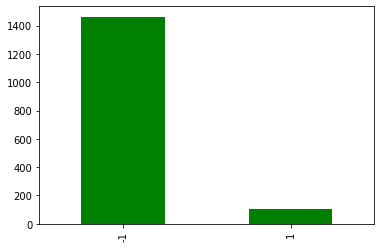

In [8]:
#frequency distribution of target values
df.status.value_counts().plot(kind = 'bar',color='green')

## Analysis of Target Variable (Hina added)

### Distribution of Target Variable w.r.t Timestamps

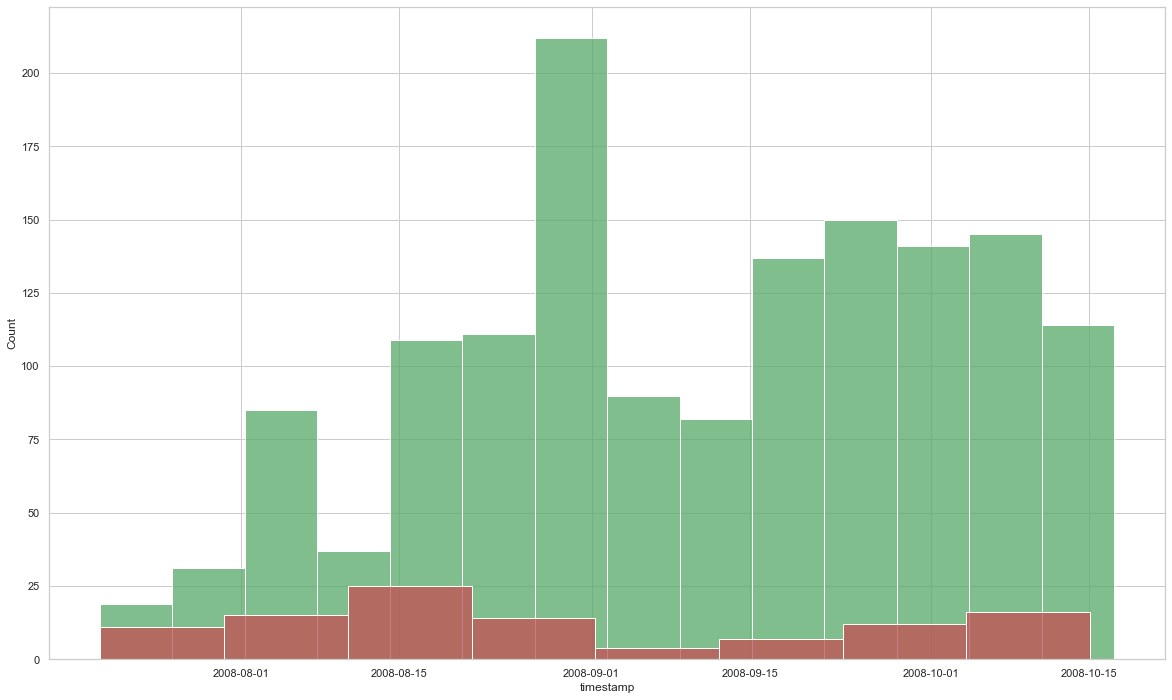

In [29]:
#distribution of Traget variable in terms of timestamp
sns.histplot( df[df.status == -1]['timestamp'], color = 'g');
sns.histplot( df[df.status == 1]['timestamp'], color = 'r');

#### Analysis of Target in differet timeframes (months,year,day etc.)

In [ ]:
signal_df= df.copy(deep=True)

signal_df['year'] = pd.DatetimeIndex(signal_df['timestamp']).year
signal_df['month'] = pd.DatetimeIndex(signal_df['timestamp']).month
signal_df['month_name'] = pd.DatetimeIndex(signal_df['timestamp']).month_name()
signal_df['date'] = pd.DatetimeIndex(signal_df['timestamp']).day
signal_df['week_day'] = pd.DatetimeIndex(signal_df['timestamp']).weekday
signal_df['week_day_name'] = pd.DatetimeIndex(signal_df['timestamp']).day_name()
signal_df['start_time'] = pd.DatetimeIndex(signal_df['timestamp']).time
signal_df['hour'] = pd.DatetimeIndex(signal_df['timestamp']).hour
signal_df['min'] = pd.DatetimeIndex(signal_df['timestamp']).minute

#Checking

In [ ]:
signal_df.year.unique()
#signal_df.month.value_counts()
signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
signal_df.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 24, 14, 26])

##### Grid Plot

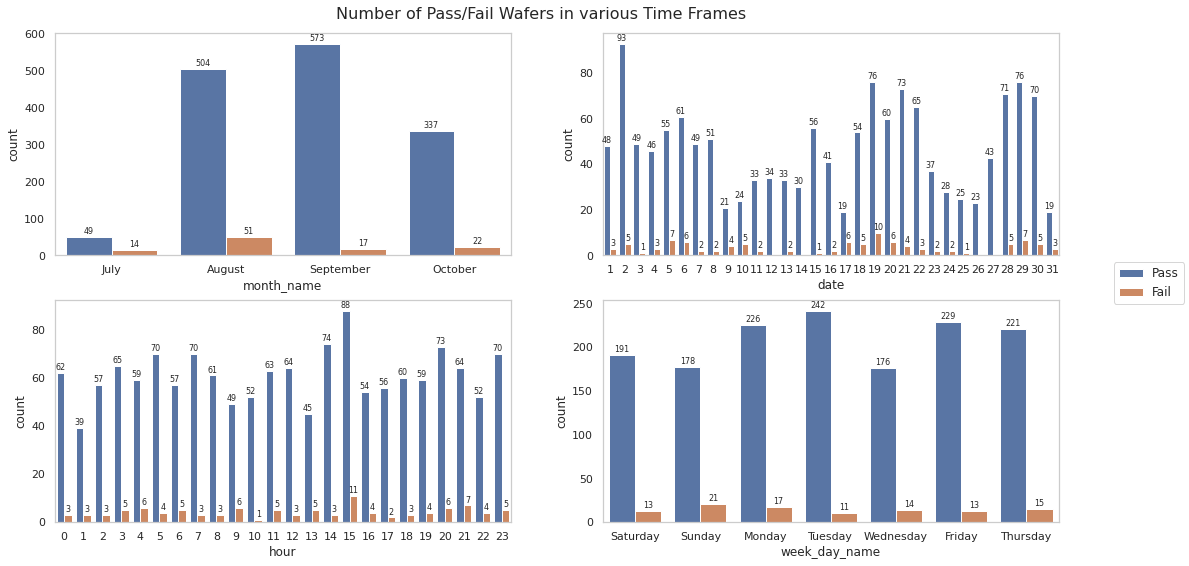

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(18, 9))

mx, dx, wx, hx = axes.flatten()
sns.set(style="whitegrid", font="CMU Sans Serif" )
mx=sns.countplot(ax=axes[0, 0],data=signal_df, x="month_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
mx.get_legend().remove()
add_value_labels(mx,1)
#mx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
dx=sns.countplot(ax=axes[0, 1],data=signal_df, x="date",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
dx.get_legend().remove()
add_value_labels(dx,1)
#dx.legend(['Pass','Fail'])
sns.set(style="whitegrid", font="CMU Sans Serif" )
wx=sns.countplot(ax=axes[1, 1],data=signal_df, x="week_day_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
wx.get_legend().remove()
add_value_labels(wx,1)
#wx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
hx=sns.countplot(ax=axes[1, 0],data=signal_df, x="hour",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
hx.get_legend().remove()
add_value_labels(hx,1)
#hx.legend(['Pass','Fail'])
handles, labels = mx.get_legend_handles_labels()
fig.legend(handles,['Pass','Fail'] ,loc='center right', fontsize='medium')
fig.suptitle("Number of Pass/Fail Wafers in various Time Frames", fontsize=16,y=0.92)

plt.show()

## Pie chart

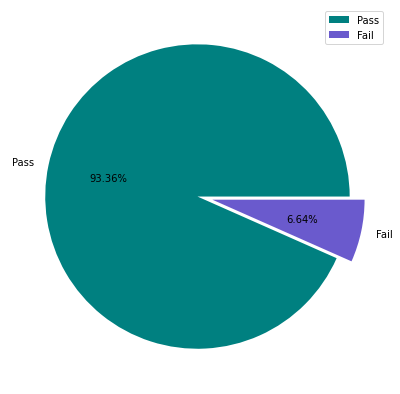

-1    1463
 1     104
Name: status, dtype: int64

In [9]:
#pie chart for 'status(fail-pass)
plt.rcParams['figure.figsize'] = (7,7)
labels = ['Pass', 'Fail']
size = df['status'].value_counts()
colors = ['teal', 'slateblue']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.legend()
plt.show()
df['status'].value_counts()

# Outliers

## Functions used in the code 


### Function to add value labels top each bar

In [10]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0  :
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size=8)                      # Vertically align label differently for
                                        # positive and negative values.

### Function to evaluate descriptive statistics 

In [11]:
#Function for descriptive analysis
def eda(frame,output):
    #output={}
    for col in frame.columns:
        mean=frame[col].mean()
        std= frame[col].std()
        percent_null= pd.isnull(frame[col]).sum()/len(frame[col])*100
        unique=len(pd.unique(frame[col]))
        outlier_df3= frame[(np.abs(stats.zscore(frame[col])) > 3)]
        outlier_df2= frame[(np.abs(stats.zscore(frame[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(frame)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(frame)
        min= frame[col].min()
        q25=frame[col].quantile(0.25)
        q50=frame[col].quantile(0.5)
        q75=frame[col].quantile(0.75)
        max= frame[col].max()
        skewness=frame[col].skew()
        kurtosis=frame[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

### Function to evaluate skewness 

In [12]:
def skw(row):
    if row['Q3Q2'] > row['Q2Q1']:
        return 'Right'
    elif row['Q2Q1'] > row['Q3Q2']:
        return 'Left'
    else: 
        return 'Equal'


## EDA

In [16]:
#dictionary for EDA
result={}
result=eda(df_features,result)
result1=pd.DataFrame.from_dict(result,orient='index')
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
result1

,mean,std,percent_null,unique,count_3s_perc,count_2s_perc,min,q25,q50,q75,max,skewness,kurtosis
feature1,3014.452896,73.621787,0.382897,1521,0.0,0.0,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500,0.513657,1.470652
feature2,2495.850231,80.407705,0.446713,1505,0.0,0.0,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400,-0.043066,2.241442
feature3,2200.547318,29.513152,0.893427,508,0.0,0.0,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667,-0.305764,2.304955
feature4,1396.376627,441.691640,0.893427,519,0.0,0.0,0.0000,1081.875800,1285.21440,1591.223500,3715.0417,1.711627,4.594917
feature5,4.197013,56.355540,0.893427,504,0.0,0.0,0.6815,1.017700,1.31680,1.525700,1114.5366,19.645262,384.452750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.067826,3.578033,0.063816,1503,0.0,0.0,1.1975,2.306500,2.75765,3.295175,99.3032,24.697136,659.562151
feature587,0.021458,0.012358,0.063816,323,0.0,0.0,-0.0169,0.013425,0.02050,0.027600,0.1028,1.438025,6.975957
feature588,0.016475,0.008808,0.063816,261,0.0,0.0,0.0032,0.010600,0.01480,0.020300,0.0799,1.947408,7.092926
feature589,0.005283,0.002867,0.063816,121,0.0,0.0,0.0010,0.003300,0.00460,0.006400,0.0286,2.029372,8.238837


## Visualising Outliers

### Outlier chart for whole data set

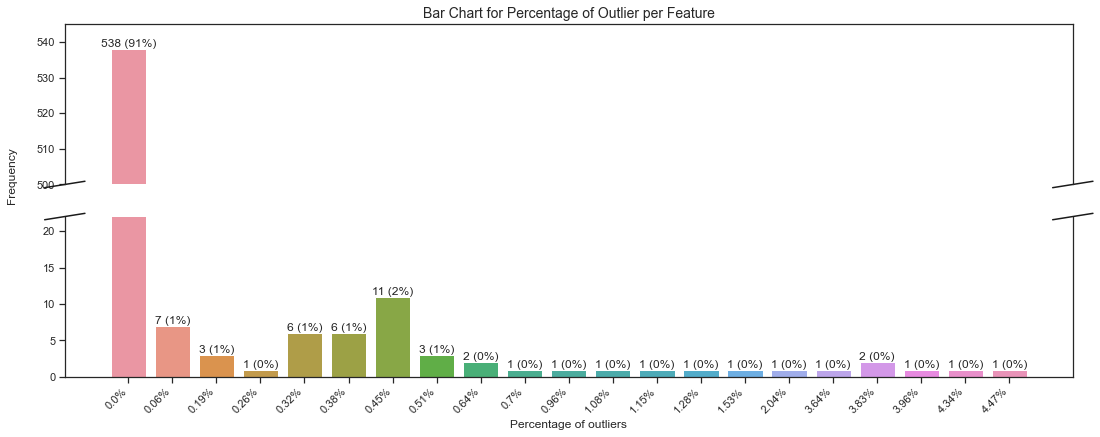

In [18]:
#broken axis bar chart for outlier percentage 
# set style for seaborn plot
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# create a color palette (we only have three different colors for the three different tests T1...T3)
pal = sns.color_palette(n_colors=3)
#shared x axis
f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(20, 7))
ax1 = sns.countplot(x='count_3s_perc',data=result1, ax=ax1)
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# we basically do the same thing again for the second plot
ax2 = sns.countplot(x='count_3s_perc',data=result1, ax=ax2)

ax1.set_ylim(500, 545)
ax2.set_ylim(0, 22)
# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)
# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_title("Bar Chart for Percentage of Outlier per Feature", size=14)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage of outliers", size=12 )
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.11, 0.55,"Frequency", va="center", rotation="vertical")

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
#xlabels = ['{:,.3f}'.format(x) + '%' for x in ax2.get_xticks()]
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=45,ha="right")

abs_values = result1['count_3s_perc'].value_counts().sort_index()
rel_values = result1['count_3s_perc'].value_counts(normalize=True).sort_index().values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax1.bar_label(container=ax1.containers[0], labels=lbls)
ax2.bar_label(container=ax2.containers[0], labels=lbls)
#labels = [f' {v.get_width()}\n {df.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]


# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)
#add_value_labels(ax2,5)

# label each bar in histogram
#plt.show()
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()


### Visualising only those features which have outliers

Text(0.5, 1.0, 'Percentage of Outliers Per Feature > 0%')

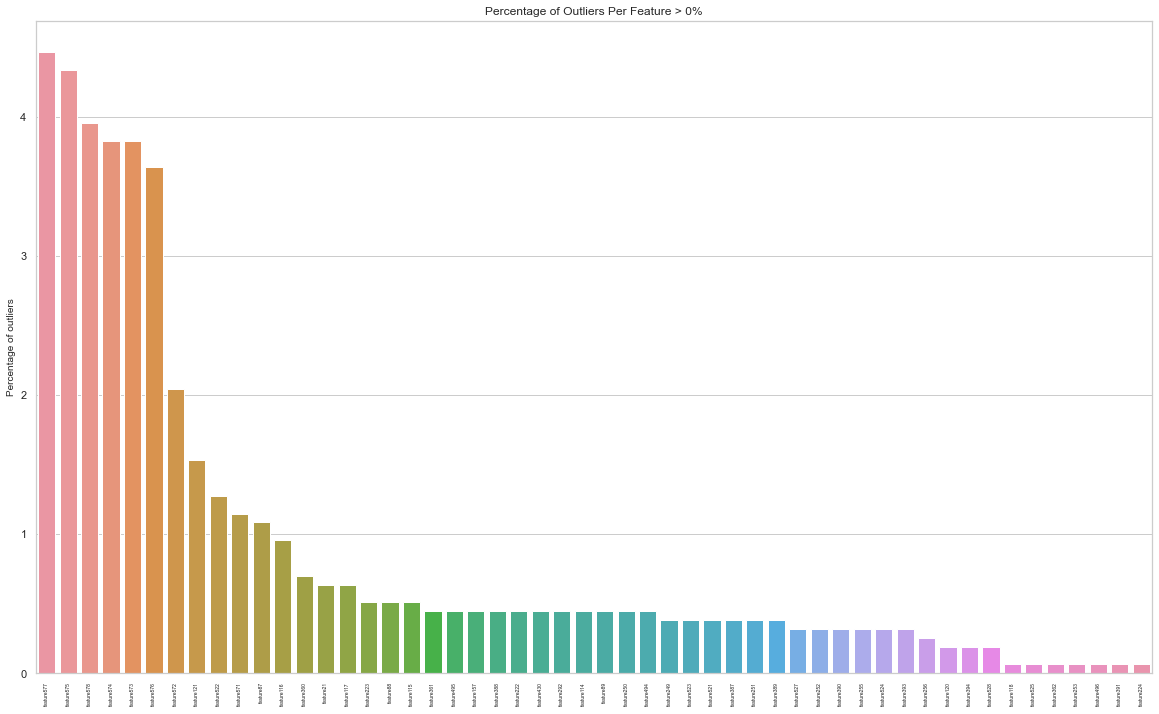

In [28]:
#visualizing features having outliers
plt.rcParams['figure.figsize'] = (20, 12) 

result1_out= result1.loc[result1['count_3s_perc'] > 0]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=result1_out.index, y=result1_out['count_3s_perc'], data=result1_out, order=result1_out.sort_values('count_3s_perc',ascending = False).index)
#ax = sns.barplot(x=result1.index, y=result1['count_3s_perc'], data=result1, order=result1.sort_values('count_3s_perc',ascending = False).index)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=90,ha="right")
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_size(5)
ax.set_ylabel("Percentage of outliers", size=10 )
ax.set_title("Percentage of Outliers Per Feature > 0%", size=12 )


## Distribution of Features (Normal, Uniform, Skewed)


### Normally Distributed

In [ ]:
alpha = 0.05
ntest= df_features.apply(normaltest,nan_policy='omit')
ntest=ntest.transpose()
ntest.columns= ['stat', 'p']
nm_features=ntest[ntest['p']>alpha]
#result1.loc[nm_features.index,:]

## Uniform Distribution

In [ ]:
ncol_name= nm_features.index
no_norm=df_features.loc[:, ~df_features.columns.isin(ncol_name)].copy()
#stats.kstest(time, stats.uniform(loc=0.0, scale=100.0).cdf)
uniform_f=result1[result1['std']==0].index
uni_norm=ncol_name.union(uniform_f)

## Skewed Data

In [ ]:
skewed_f=df_features.loc[:, ~df_features.columns.isin(uni_norm)].copy()
skew_eda = skewed_f.describe().T
# Checking
#skew_eda={}
#skew_eda=eda(skewed_f,skew_eda)
#skew_eda=pd.DataFrame.from_dict(skew_eda,orient='index')
#skew_eda.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
#skew_eda['Q2Q1']=skew_eda['50%']-skew_eda['25%']
#skew_eda['Q3Q2']=skew_eda['75%']-skew_eda['50%']
#skew_eda['sk']=  skew_eda.apply(lambda row: skw(row), axis=1)
#skew_eda.loc[skew_eda['sk']== 'Equal']

## Visualisng the distribution results

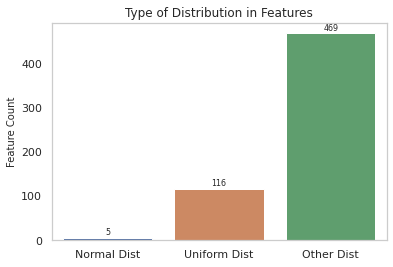

In [ ]:
# creating a dataframe with distribution counts
dist = pd.DataFrame(
    [{len(ncol_name)},
    {len(uniform_f)},
    {len(skewed_f.columns)}
    ],index=["Normal Dist","Uniform Dist","Other Dist"])
dist.columns=['Count']
dist.index.name='Dist'
#labels = [item.get_text() for item in ax2.get_xticklabels()]
#ax2.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=45,ha="right")
sns.set_style("whitegrid", {'axes.grid' : False})
nx=sns.barplot(x=dist.index,y=dist['Count'],data=dist)
add_value_labels(nx,1)
nx.set_ylabel("Feature Count",size=10,fontname="Arial")
nx.set_xlabel(None)
nx.set_title("Type of Distribution in Features",size=12)
plt.show()

# Splitting Train and Test Data 

In [ ]:
#separate target variable and remaining data
x = df.iloc[:,:590]
y = df.iloc[:,590]

# splitting df into train test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)# random state = fix the random generator (same data all time)
#startify preserves the same proportions of examples in each class as observed in the original dataset- imbalance data .

#Checking

In [ ]:
#frequency count of target varaible in training and test data separately (after splitting)
#x_train - 1253.590
#x_test - 314.590
#y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)
y_train.value_counts(normalize=True).plot(kind='bar')
y_train=y_train.to_frame()
y_train['index']=y_train.index
y_train
sns.histplot(data=y_train,x=y_train[y_train['status'] == -1]['index'],kde=True,color='g')
sns.histplot(data=y_train,x=y_train[y_train['status'] == 1]['index'],kde=True,color='r')
x_train


## EDA Training data 

In [ ]:
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)

xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')

xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


### Null/Missing Value in Train data set

#Checking

In [ ]:
result1['percent_null'].hist()

"""Before split and after split the trend of missing percent values are same
important thresholds:
- big jump from 17% to 45%
- after 45% , more number of columns show 65% null values , therefore threshold should be between 55% to 65%
"""

result1.percent_null.value_counts().sort_index()

xtrain_eda1.percent_null.value_counts().sort_index()

<AxesSubplot:xlabel='percent_null', ylabel='Count'>

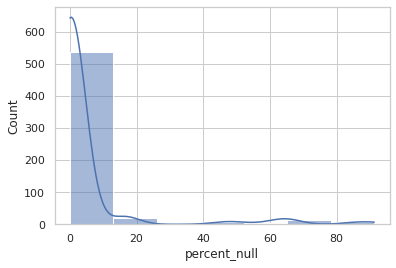

In [ ]:
sns.histplot(data=xtrain_eda1, x='percent_null',bins=7, kde=True)

### Standard deviation Before and after splitting

#### Std Before split 

<AxesSubplot:xlabel='std', ylabel='Count'>

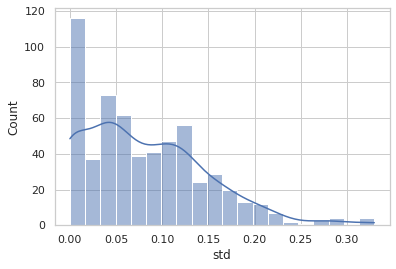

In [ ]:
scaler = MinMaxScaler()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.

data_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
data_scaled_desc=data_scaled.describe().T

sns.histplot(data=data_scaled_desc, x='std',bins=20, kde=True)

#### Std After Split

<AxesSubplot:xlabel='std', ylabel='Count'>

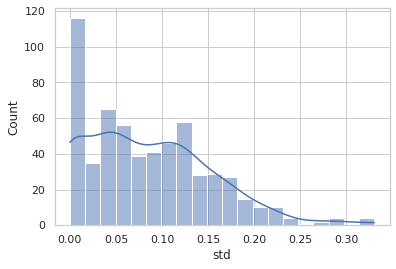

In [ ]:
xtrain_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
xtrain_scaled_desc=xtrain_scaled.describe().T
#xtrain_scaled_desc['std'].value_counts().sort_index()

sns.histplot(data=xtrain_scaled_desc, x='std',bins=20, kde=True)